In [1]:
import numpy as np
from sklearn.datasets import load_iris
#a1
def load_binary_iris_data():
    data = load_iris()
    X = data.data
    y = data.target
    binary_mask = y < 2
    return X[binary_mask], y[binary_mask]

def compute_class_centroids_and_spreads(X, y):
    class0 = X[y == 0]
    class1 = X[y == 1]

    centroid0 = np.mean(class0, axis=0)
    centroid1 = np.mean(class1, axis=0)

    spread0 = np.std(class0, axis=0)
    spread1 = np.std(class1, axis=0)

    interclass_distance = np.linalg.norm(centroid0 - centroid1)

    return centroid0, spread0, centroid1, spread1, interclass_distance
X, y = load_binary_iris_data()
centroid0, spread0, centroid1, spread1, distance = compute_class_centroids_and_spreads(X, y)

centroid0, spread0, centroid1, spread1, distance

(array([5.006, 3.428, 1.462, 0.246]),
 array([0.34894699, 0.37525458, 0.17191859, 0.10432641]),
 array([5.936, 2.77 , 4.26 , 1.326]),
 array([0.51098337, 0.31064449, 0.46518813, 0.19576517]),
 np.float64(3.2082811597489393))

Matplotlib is building the font cache; this may take a moment.


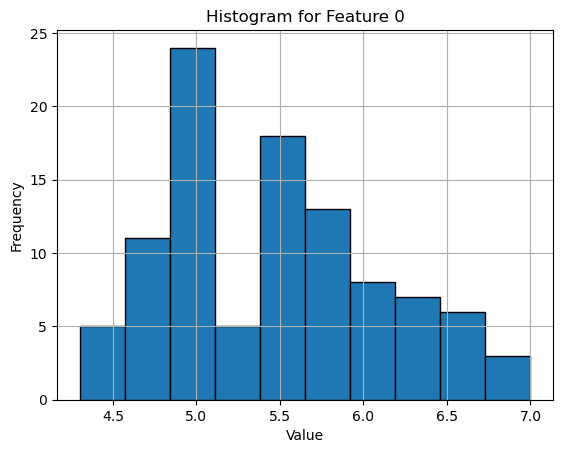

(np.float64(5.471000000000001), np.float64(0.40765900000000016))

In [2]:
import matplotlib.pyplot as plt
#a2
def analyze_feature_distribution(X, feature_index):
    feature = X[:, feature_index]
    mean_val = np.mean(feature)
    var_val = np.var(feature)

    plt.hist(feature, bins=10, edgecolor='black')
    plt.title(f"Histogram for Feature {feature_index}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()
    return mean_val, var_val
mean_feature, var_feature = analyze_feature_distribution(X, feature_index=0)
mean_feature, var_feature

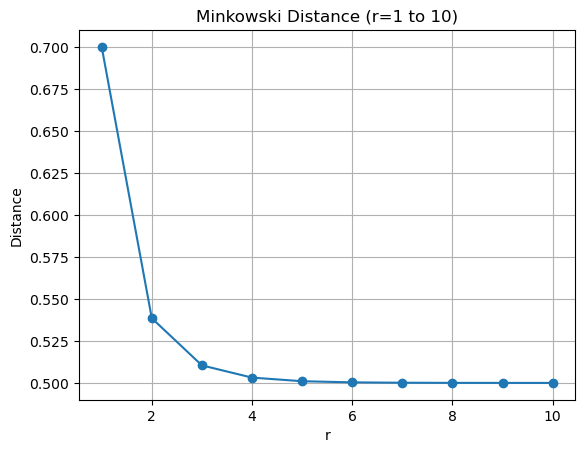

In [3]:
#a3
def plot_minkowski_distances(vec1, vec2):
    r_values = range(1, 11)
    distances = [np.sum(np.abs(vec1 - vec2) ** r) ** (1 / r) for r in r_values]
    plt.plot(r_values, distances, marker='o')
    plt.title("Minkowski Distance (r=1 to 10)")
    plt.xlabel("r")
    plt.ylabel("Distance")
    plt.grid(True)
    plt.show()
plot_minkowski_distances(X[0], X[1])

In [4]:
#a4
from sklearn.model_selection import train_test_split
def split_dataset(X, y, test_size=0.3):
    return train_test_split(X, y, test_size=test_size, random_state=42)
X_train, X_test, y_train, y_test = split_dataset(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70, 4), (30, 4), (70,), (30,))

In [5]:

#a5
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
print("kNN model trained successfully with k=3.")

kNN model trained successfully with k=3.


In [6]:

#a6
accuracy = knn_model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 1.0000


In [7]:
#a7
predictions = knn_model.predict(X_test)
print("Predicted class labels:", predictions)
print("Actual class labels:   ", y_test.tolist())


Predicted class labels: [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1]
Actual class labels:    [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1]


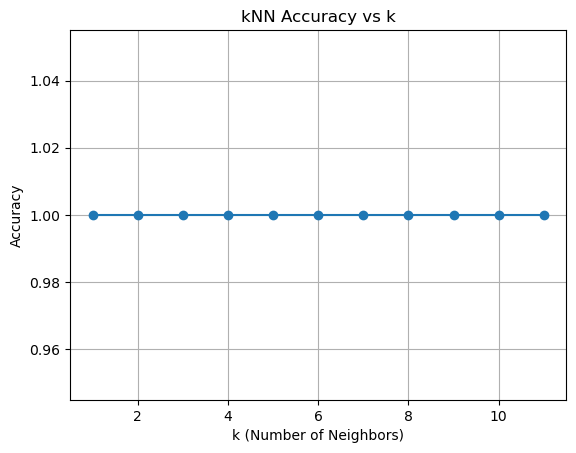

In [8]:
#a8
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_values = range(1, 12)
accuracies = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
plt.plot(k_values, accuracies, marker='o')
plt.title("kNN Accuracy vs k")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


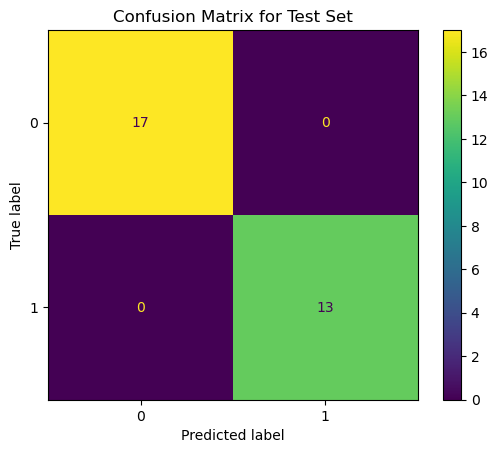

Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000


In [9]:
#a9
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
y_pred = knn_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix for Test Set")
plt.show()
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")